# PRACTICA GUIADA: DBSCAN

Para implementar DBSCAN primero importamos los paquetes necesarios de `sklearn` y los datos con los que trabajarmos: los viejos y conocidos datos de iris

## Introducción: importando datos

In [1]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = load_iris()

In [3]:
X, y = data.data, data.target

## Desarrollo

### Estandarizamos las variables 

In [4]:
X = StandardScaler().fit_transform(X)

### Visualizamos los datos 

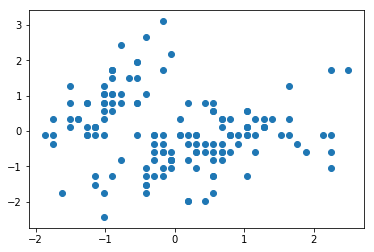

In [5]:
plt.scatter(X[:,0], X[:,1])

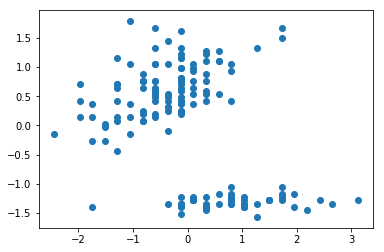

In [6]:
plt.scatter(X[:,1], X[:,2])

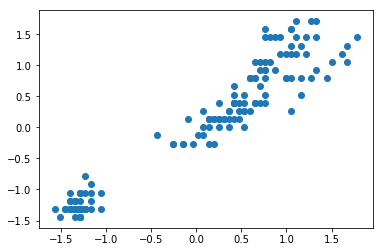

In [7]:
plt.scatter(X[:,2], X[:,3])

### Generamos los clusters y extraemos las etiquetas

Implementamos `DBSCAN`

In [8]:
dbscn = DBSCAN(eps = 0.8, min_samples = 7).fit(X)

Aquí seteamos un valor de epsilon (`eps`) 0.8 y el mínimo de puntos (`min_samples`) a 7.

Como regla general al elegir el mínimo de pntos, siempre se debería tratar de setear este parámetro en un valor igual o mayor al número de dimensiones en los datos más uno. Epsilon es un poco mpas complejo y usa un método llamado k-distancias, que puede ayudar a visualizar el mejor epsilon. Vamos a ver de qué forma diferentes valores de epsilon afectan los resultados.

In [9]:
core_samples = dbscn.core_sample_indices_
labels = dbscn.labels_  

El algoritmo DBSCAN en `sklearn` devuelve dos elementos:
    
   - `core_samples`: son los índices de puntos alrededor de los que el algoritmo busca para formar los clusters
   - `labels` :las etiquetas
   - `components`: es una copia de los registros del dataset original que coincide con las core samples

#### ¿Cuántos puntos "ruidosos" hay en el dataset?

In [11]:
core_samples_mask = np.zeros_like(dbscn.labels_, dtype=bool)
core_samples_mask[dbscn.core_sample_indices_] = True
labels = dbscn.labels_

####  ¿Cuántos clusters se generaron?

In [12]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [13]:
n_clusters_

2

## Evaluando la performance de DBSCAN

Podemos usar estos comandos para evaluar la performance de DBSCAN. Una aclaración: como podrán ver, hemos usado las medidas que hemos visto la clase pasada. Pueden investigar muchas otras medidas en la documentación de [Scikit-Learn](http://scikit-learn.org/stable/modules/clustering#clustering-performance-evaluation).

In [14]:
def eval_dbscan(n_clusters, X, y, labels):
    print('Estimated number of clusters: %d' % n_clusters), "\n"
    print('EXTERNAL EVALUATION')
    print("Accuracy: %0.3f" % metrics.accuracy_score(y, labels))
    print('INTERNAL EVALUATION')
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
    print("Calinski-Harabaz: %0.3f"% metrics.calinski_harabaz_score(X, labels)), "\n"

In [15]:
eval_dbscan(n_clusters_, X, y, labels)

Estimated number of clusters: 2
EXTERNAL EVALUATION
Accuracy: 0.647
INTERNAL EVALUATION
Silhouette Coefficient: 0.522
Calinski-Harabaz: 111.819


** ¿Qué pueden decir de estos resultados? **

** Ploteamos los resultados **

Graficamos los resultados: la idea es poder visualizar de forma diferenciada los puntos. 

- los colores diferencian los clusters
- en círculos coloreados grandes veremos los "core points"
- en cŕiculos coloreados pequeños, los "reacheable points"
- en círculos pequeños negros, los puntos ruidosos

In [16]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

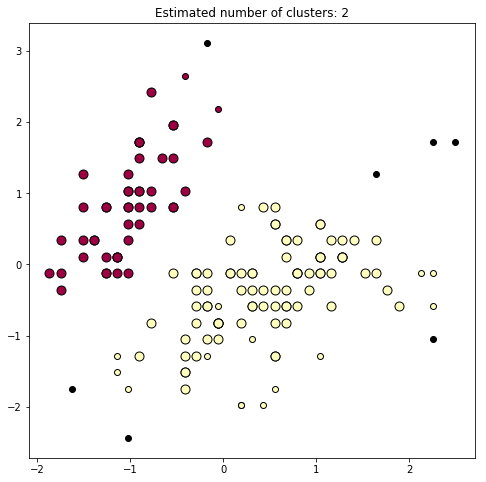

In [17]:
plt.figure(figsize=[8,8])
for k, col in zip(unique_labels, colors):
    if k == -1:         
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=9)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()